In [12]:
import numpy as np
import pandas as pd
import cv2
import os
from tqdm import tqdm
from glob import glob
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

In [10]:
import tensorflow as tf

In [4]:
pip install matplotlib
pip install scikit-learn
pip install Pillow
pip install pandas
pip install tqdm
pip install opencv-python
pip install --upgrade tensorflow pillow
!pip install Pillow
!pip install kaggle
!pip install opencv-python
!pip install tqdm
!pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [10]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c state-farm-distracted-driver-detection

mkdir: cannot create directory ‘/home/exouser/.kaggle’: File exists


100%|██████████████████████████████████████▉| 3.99G/4.00G [00:24<00:00, 189MB/s]
100%|███████████████████████████████████████| 4.00G/4.00G [00:24<00:00, 174MB/s]


In [3]:
import pandas as pd
df = pd.read_csv('Downloads/state-farm-distracted-driver-detection/driver_imgs_list.csv')
df.head(5)

subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg

In [4]:
import splitfolders
data_dir = 'Downloads/state-farm-distracted-driver-detection/imgs/train'
splitfolders.ratio(data_dir, output="output",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 22424 files [00:16, 1350.47 files/s]


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the batch size and image size for the data generator
batch_size = 32
img_height = 224
img_width = 224

# Create an instance of the ImageDataGenerator class with no augmentation
datagen_train = ImageDataGenerator(rescale=1./255)

# Create a separate instance of the ImageDataGenerator class for the validation data
datagen_val = ImageDataGenerator(rescale=1./255)

# Create separate generators for the training and validation sets
train_generator = datagen_train.flow_from_directory(
    'output/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen_val.flow_from_directory(
    'output/val',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',

)

Found 17934 images belonging to 10 classes.
Found 4490 images belonging to 10 classes.


In [6]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Keras version is the same as TensorFlow version.")

TensorFlow version: 2.16.1
Keras version is the same as TensorFlow version.


In [22]:
activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}

image_count = 1
BASE_URL = 'Downloads/state-farm-distracted-driver-detection/imgs/train/'
for directory in os.listdir(BASE_URL):
    if directory[0] != '.':
        for i, file in enumerate(os.listdir(BASE_URL + directory)):
            if i == 1:
                break
            else:
                image_count += 1
                image = mpimg.imread(BASE_URL + directory + '/' + file)

In [50]:
model4 = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [51]:
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,990,026 (38.11 MB)

 Trainable params: 9,990,026 (38.11 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history4 = model4.fit(
    train_generator,
    validation_data=val_generator,
    batch_size = 32,
    epochs=10
)

Epoch 1/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 958s 2s/step - accuracy: 0.5050 - loss: 1.3532 - val_accuracy: 0.9735 - val_loss: 0.1011
Epoch 2/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 957s 2s/step - accuracy: 0.9823 - loss: 0.0652 - val_accuracy: 0.9846 - val_loss: 0.0511
Epoch 3/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 957s 2s/step - accuracy: 0.9915 - loss: 0.0317 - val_accuracy: 0.9871 - val_loss: 0.0433
Epoch 4/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 955s 2s/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.9882 - val_loss: 0.0496
Epoch 5/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 955s 2s/step - accuracy: 0.9930 - loss: 0.0240 - val_accuracy: 0.9846 - val_loss: 0.0667
Epoch 6/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 956s 2s/step - accuracy: 0.9962 - loss: 0.0131 - val_accuracy: 0.9878 - val_loss: 0.0404
Epoch 7/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 954s 2s/step - accuracy: 0.9950 - loss: 0.0161 - val_accuracy: 0.9880 - val_loss: 0.0514
Epoch 8/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 952s 2s/step - accuracy: 0.9965 - loss: 0.0180 - val_accu

In [53]:
model4.save('model1with1M.h5')

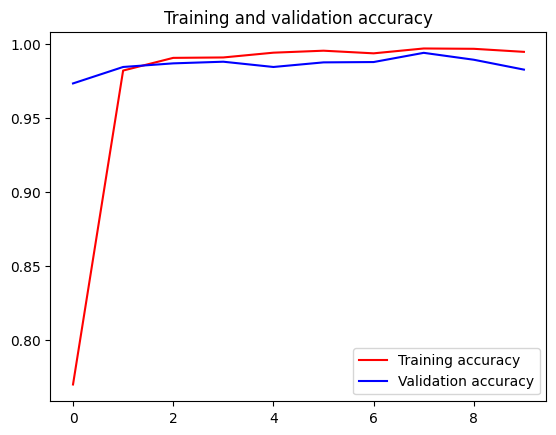

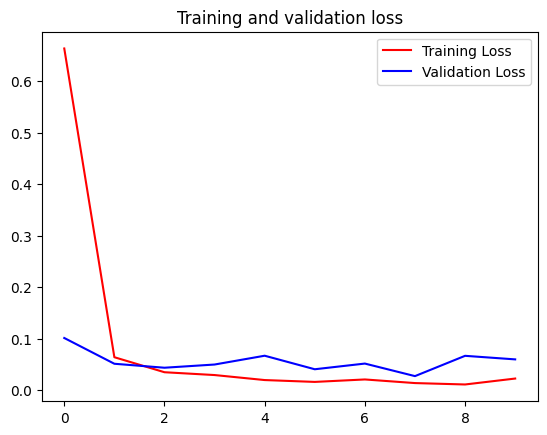

In [54]:
import matplotlib.pyplot as plt

acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [57]:
model5 = models.Sequential([
    layers.Conv2D(64, (3, 3), input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    
    layers.Dense(10, activation='softmax'),
])

In [58]:
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model5.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 222, 222, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 109, 109, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 9,993,866 (38.12 MB)

 Trainable params: 9,991,946 (38.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [60]:
history5 = model5.fit(
    train_generator,
    validation_data=val_generator,
    batch_size = 32,
    epochs=5
)

Epoch 1/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 1797s 3s/step - accuracy: 0.8595 - loss: 0.5087 - val_accuracy: 0.9690 - val_loss: 0.1203
Epoch 2/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 2261s 4s/step - accuracy: 0.9898 - loss: 0.0437 - val_accuracy: 0.9548 - val_loss: 0.1450
Epoch 3/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 2885s 5s/step - accuracy: 0.9939 - loss: 0.0254 - val_accuracy: 0.9906 - val_loss: 0.0304
Epoch 4/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 2852s 5s/step - accuracy: 0.9969 - loss: 0.0146 - val_accuracy: 0.9782 - val_loss: 0.0713
Epoch 5/5
561/561 ━━━━━━━━━━━━━━━━━━━━ 2908s 5s/step - accuracy: 0.9930 - loss: 0.0265 - val_accuracy: 0.9060 - val_loss: 0.3080


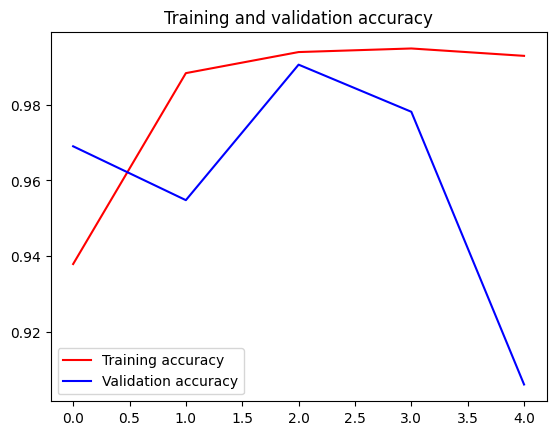

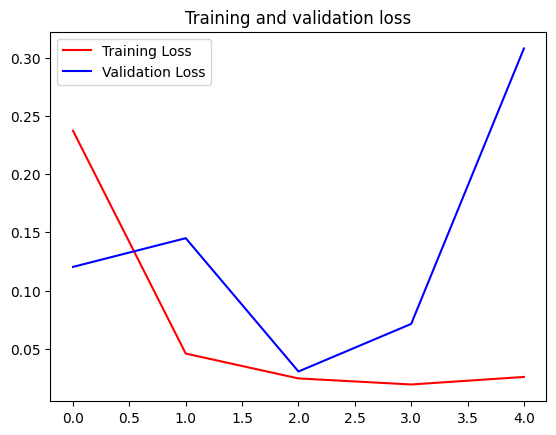

In [67]:
import matplotlib.pyplot as plt

acc2 = history5.history['accuracy']
val_acc2 = history5.history['val_accuracy']
loss2 = history5.history['loss']
val_loss2 = history5.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'r', label='Training accuracy')
plt.plot(epochs2, val_acc2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'r', label='Training Loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [61]:
model5.save('model1with1M_Norm.h5')

In [62]:
from tensorflow.keras.models import load_model

model3 = load_model('model1with1M.h5')
model4 = load_model('model1with1M_Norm.h5')

In [63]:
import os
import csv

test_dir = 'Downloads/state-farm-distracted-driver-detection/imgs/test'
csv_file = 'test_labels.csv'  # Output CSV file for test images

# Open the CSV file for writing
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_path'])  # Only one column for image paths

    # Walk through the directory structure
    for root, dirs, files in os.walk(test_dir):
        for name in files:
            if name.lower().endswith(".jpg"):
                image_path = os.path.join(root, name)  # Full path to image
                writer.writerow([image_path])  # Write to CSV

print("CSV file creation for test images is complete.")

CSV file creation for test images is complete.


In [64]:
import pandas as pd

# Load CSV to check paths
csv_file = 'test_labels.csv'
data = pd.read_csv(csv_file)

# Print the first few rows of the dataframe
print(data.head(1))

                                          image_path
0  Downloads/state-farm-distracted-driver-detecti...


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
import pandas as pd

# Load the CSV file into a DataFrame
test_df = pd.read_csv('test_labels.csv')

# Create the test generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=None,  # None since the paths in the CSV file are absolute
    x_col='image_path',
    y_col=None,  # None since we don't have labels
    target_size=(224, 224),
    class_mode=None,  # None because we don't have labels
    batch_size=32,
    shuffle=False  # Don't shuffle to maintain the order
)

Found 79726 validated image filenames.


In [66]:
predictions1 = model3.predict(test_generator)
predictions2 = model4.predict(test_generator)

/home/exouser/.conda/envs/a4/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2492/2492 ━━━━━━━━━━━━━━━━━━━━ 1282s 514ms/step
2492/2492 ━━━━━━━━━━━━━━━━━━━━ 1658s 665ms/step


In [68]:
predicted_classes1 = predictions1.argmax(axis=1)
predicted_classes2= predictions2.argmax(axis=1)

# Add the predicted classes to the DataFrame
test_df['predicted_class'] = predicted_classes1
test_df['predicted_class_with_BN'] = predicted_classes2

# Save the DataFrame back to CSV, with predictions
test_df.to_csv('test_with_predictions10m.csv', index=False)

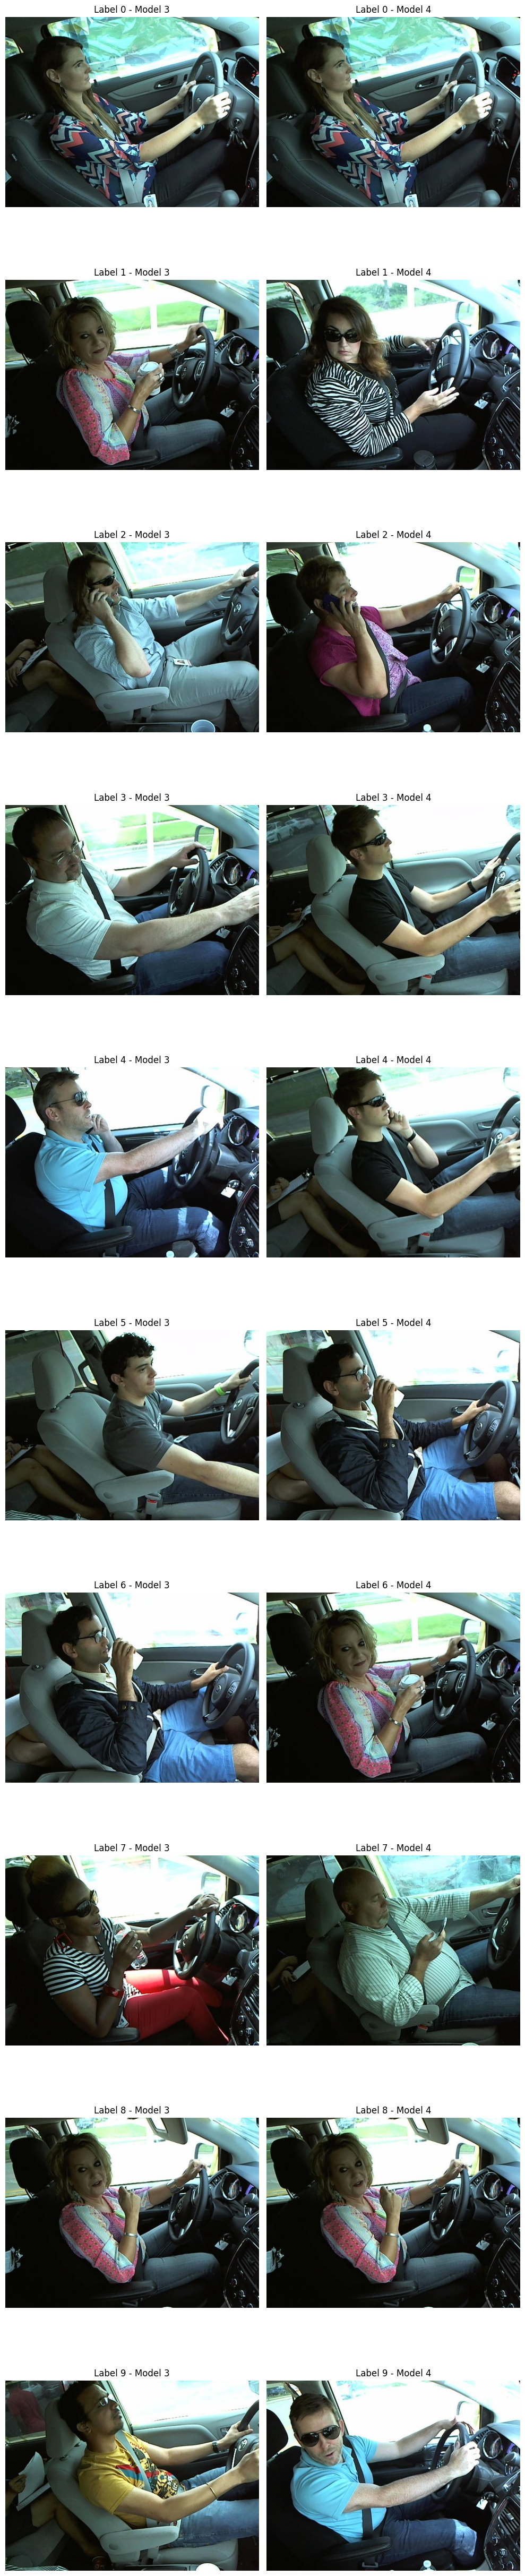

In [75]:
# Load the predictions CSV file
from PIL import Image

predictions_csv_path = 'test_with_predictions10m.csv'
predictions_df = pd.read_csv(predictions_csv_path)

# =get unique labels from both models
unique_labels = set(predictions_df['predicted_class']).union(set(predictions_df['predicted_class_with_BN']))

# To store image paths for each label
image_paths_per_label_model1 = {}
image_paths_per_label_model2 = {}

# Loop over the dataframe and collect one image path per label for each model
for label in unique_labels:
    for _, row in predictions_df.iterrows():
        if row['predicted_class'] == label and label not in image_paths_per_label_model1:
            image_paths_per_label_model1[label] = row['image_path']
        if row['predicted_class_with_BN'] == label and label not in image_paths_per_label_model2:
            image_paths_per_label_model2[label] = row['image_path']


base_img_path = os.path.dirname(predictions_csv_path)

# Plot the images side by side
fig, axs = plt.subplots(len(unique_labels), 2, figsize=(10, 50))  # Adjust figsize as needed

for i, label in enumerate(sorted(unique_labels)):
    # Load the image for the first model
    img_path1 = os.path.join(base_img_path, image_paths_per_label_model1[label])
    img1 = Image.open(img_path1)
    axs[i, 0].imshow(img1)
    axs[i, 0].set_title(f"Label {label} - Model 3")
    axs[i, 0].axis('off')

    # Load the image for the second model
    img_path2 = os.path.join(base_img_path, image_paths_per_label_model2[label])
    img2 = Image.open(img_path2)
    axs[i, 1].imshow(img2)
    axs[i, 1].set_title(f"Label {label} - Model 4")
    axs[i, 1].axis('off')

plt.tight_layout()


output_file_path = 'comparison_figure_1M.png'

# Save the figure
plt.savefig(output_file_path)
plt.show()